In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random

In [2]:
movie_df = pd.read_csv('movies.csv')

In [3]:
print(movie_df.head())

             original_title                 genre  duration  \
0  The Shawshank Redemption                 Drama  2.366667   
1             The Godfather          Crime, Drama  2.916667   
2    The Godfather: Part II          Crime, Drama  3.366667   
3           The Dark Knight  Action, Crime, Drama  2.533333   
4              12 Angry Men          Crime, Drama  1.600000   

                                              actors  Unnamed: 4  Unnamed: 5  \
0  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...         NaN         NaN   
1  Marlon Brando, Al Pacino, James Caan, Richard ...         NaN         NaN   
2  Al Pacino, Robert Duvall, Diane Keaton, Robert...         NaN         NaN   
3  Christian Bale, Heath Ledger, Aaron Eckhart, M...         NaN         NaN   
4  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 13  \
0         NaN         NaN         NaN         NaN  ...          NaN  

In [4]:
def convert_genre_kids(genre):
    if 'Family' in genre:
        return 'Kids'
    else:
        return genre
    
def convert_genre_horror(genre):
    if 'Horror' in genre or 'Sci-Fi'in genre or 'Thriller' in genre:
        return 'Horror'
    else:
        return genre
    
def convert_genre_comedy(genre):
    if 'Comedy' in genre or 'Western' in genre:
        return 'Comedy'
    else:
        return genre
    
def convert_genre_action(genre):
    if 'Action' in genre or 'Adventure' in genre:
        return 'Action'
    elif 'Drama' in genre:
        return 'Action'
    else:
        return genre
    
# def convert_genre_last(genre):
#     if 'Action' not in genre and 'Kids' not in genre and 'Comedy' not in genre and 'Horror' not in genre:
#         return 'Action'
    
movie_df['genre'] = movie_df['genre'].apply(convert_genre_kids)
movie_df['genre'] = movie_df['genre'].apply(convert_genre_horror)
movie_df['genre'] = movie_df['genre'].apply(convert_genre_comedy)
movie_df['genre'] = movie_df['genre'].apply(convert_genre_action)
# movie_df['genre'] = movie_df['genre'].apply(convert_genre_last)

In [5]:
columns_to_drop = list(range(4, 22))  # Create a list of column indices to drop

movie_df.drop(columns=movie_df.columns[columns_to_drop], inplace=True)
last_column_index = len(movie_df.columns) - 1  # Get the index of the last column
movie_df.drop(columns=movie_df.columns[last_column_index], inplace=True)
movie_df['actors'] = movie_df['actors'].str.split(',').str[:2].str.join(', ')

movie_df

,original_title,genre,duration,actors
0,The Shawshank Redemption,Action,2.366667,"Tim Robbins, Morgan Freeman"
1,The Godfather,Action,2.916667,"Marlon Brando, Al Pacino"
2,The Godfather: Part II,Action,3.366667,"Al Pacino, Robert Duvall"
3,The Dark Knight,Action,2.533333,"Christian Bale, Heath Ledger"
4,12 Angry Men,Action,1.600000,"Martin Balsam, John Fiedler"
...,...,...,...,...
111,Airplane!,Comedy,3.240000,"Robert Hays, Julie Hagerty"
112,The Sixth Sense,Horror,3.270000,"Bruce Willis, Haley Joel Osment"
113,The Silence of the Lambs,Horror,3.670000,"Jodie Foster, Anthony Hopkins"
114,The Matrix,Action,3.590000,"Keanu Reeves, Laurence Fishburne"


In [6]:
# Assuming your modified DataFrame is named movie_df
movie_df.to_csv('updated_movies.csv', index=False)

In [7]:
new_df = pd.DataFrame(columns=['user_id', 'movie','genre','age','region'])
regions = ['NAM', 'APAC', 'EMEA', 'LATAM']

In [8]:
num_entries = 5000
for i in range(num_entries):
    random_id = random.randint(1, 1000)  # Generate a random 4-digit number
    new_df = new_df.append({'user_id': random_id}, ignore_index=True)
new_df['user_id'] = new_df['user_id'].astype(int)
new_df.head()

,user_id,movie,genre,age,region
0,61,NaN,NaN,NaN,NaN
1,344,NaN,NaN,NaN,NaN
2,223,NaN,NaN,NaN,NaN
3,26,NaN,NaN,NaN,NaN
4,780,NaN,NaN,NaN,NaN


In [9]:
new_df = new_df[:num_entries]

sampled_movies = random.choices(movie_df['original_title'], k=num_entries)

new_df['movie'] = sampled_movies

In [10]:
movie_genre_dict = dict(zip(movie_df['original_title'], movie_df['genre']))
new_df['genre'] = new_df['movie'].map(movie_genre_dict)

In [11]:
new_df

,user_id,movie,genre,age,region
0,61,Taare Zameen Par,Kids,NaN,NaN
1,344,Joker,Horror,NaN,NaN
2,223,Hotaru no haka,Action,NaN,NaN
3,26,Taxi Driver,Action,NaN,NaN
4,780,The Kid,Kids,NaN,NaN
...,...,...,...,...,...
4995,540,La vita è bella,Comedy,NaN,NaN
4996,66,La vita è bella,Comedy,NaN,NaN
4997,500,Anchorman,Comedy,NaN,NaN
4998,48,North by Northwest,Horror,NaN,NaN


In [12]:
new_df['age'] = [random.randint(18, 75) for _ in range(num_entries)]

In [13]:
new_df['region'] = [random.choice(regions) for _ in range(num_entries)]

In [14]:
new_df

,user_id,movie,genre,age,region
0,61,Taare Zameen Par,Kids,53,LATAM
1,344,Joker,Horror,49,EMEA
2,223,Hotaru no haka,Action,61,LATAM
3,26,Taxi Driver,Action,39,LATAM
4,780,The Kid,Kids,43,LATAM
...,...,...,...,...,...
4995,540,La vita è bella,Comedy,66,EMEA
4996,66,La vita è bella,Comedy,62,EMEA
4997,500,Anchorman,Comedy,46,APAC
4998,48,North by Northwest,Horror,74,NAM


In [15]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np

# Number of entries in the new DataFrame
num_entries = 1000

# Generate data for the columns
customer_ids = [i + 1 for i in range(num_entries)]
plans = [random.choice(['Streaming', 'Mail', 'Both']) for _ in range(num_entries)]
signup_dates = [datetime(random.randint(2012, 2014), 12, 25) for _ in range(num_entries)]
first_charge_dates = [signup + timedelta(days=7) if random.random() < 0.5 else None for signup in signup_dates]
cancel_dates = [charge + timedelta(days=random.randint(1, 30)) if charge is not None and random.random() < 0.5 else None for charge in first_charge_dates]
channels = [random.choice(['SEO', 'PPC', 'Direct']) for _ in range(num_entries)]

# Create the DataFrame
customer_df = pd.DataFrame({
    'Customer_ID': customer_ids,
    'Plan': plans,
    'Signup_Date': signup_dates,
    'First_Charge_Date': first_charge_dates,
    'Cancel_Date': cancel_dates,
    'Channel': channels
})

# Convert First_Charge_Date to datetime and extract date component
customer_df['First_Charge_Date'] = pd.to_datetime(customer_df['First_Charge_Date'], errors='coerce')
customer_df['First_Charge_Date'] = customer_df['First_Charge_Date'].dt.strftime('%Y-%m-%d')

# Format 'Cancel_Date' column and remove time component
customer_df['Cancel_Date'] = customer_df['Cancel_Date'].apply(lambda x: "Null" if pd.isnull(x) else x.strftime('%Y-%m-%d'))

# Display the first few rows of the DataFrame
print(customer_df.head())


   Customer_ID       Plan Signup_Date First_Charge_Date Cancel_Date Channel
0            1       Mail  2014-12-25               NaN        Null  Direct
1            2       Both  2012-12-25        2013-01-01        Null     PPC
2            3  Streaming  2014-12-25        2015-01-01  2015-01-27  Direct
3            4       Both  2014-12-25        2015-01-01        Null     PPC
4            5  Streaming  2013-12-25               NaN        Null     SEO


In [16]:
merged_df = pd.merge(customer_df, new_df, left_on='Customer_ID', right_on='user_id', how='inner')

In [17]:
merged_df = merged_df.drop('user_id', axis=1)

In [18]:
merged_df['First_Charge_Date'] = merged_df['First_Charge_Date'].fillna("Null")

In [19]:
len(merged_df)

5000

In [20]:
merged_df[50:85]

,Customer_ID,Plan,Signup_Date,First_Charge_Date,Cancel_Date,Channel,movie,genre,age,region
50,10,Mail,2013-12-25,Null,Null,PPC,The Silence of the Lambs,Horror,75,LATAM
51,10,Mail,2013-12-25,Null,Null,PPC,The Usual Suspects,Horror,61,EMEA
52,10,Mail,2013-12-25,Null,Null,PPC,Star Wars: Episode V - The Empire Strikes Back,Action,31,APAC
53,11,Mail,2013-12-25,2014-01-01,Null,Direct,The Avengers,Action,62,LATAM
54,11,Mail,2013-12-25,2014-01-01,Null,Direct,Coco,Kids,40,APAC
55,11,Mail,2013-12-25,2014-01-01,Null,Direct,Forrest Gump,Action,68,EMEA
56,11,Mail,2013-12-25,2014-01-01,Null,Direct,Metropolis,Horror,52,EMEA
57,11,Mail,2013-12-25,2014-01-01,Null,Direct,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy,31,APAC
58,12,Both,2012-12-25,2013-01-01,2013-01-24,SEO,Forrest Gump,Action,72,LATAM
59,12,Both,2012-12-25,2013-01-01,2013-01-24,SEO,3 Idiots,Comedy,22,APAC


In [21]:
# every 3rd entry where age is greater than 25, change age to 19 and region NAM
# for all entries that are APAC, change every 2nd entry to drama 
# for all entries that are EU, change every 2nd entry to comedy 
# count all changes for each change 

counter_nam = 0
changed_entries_nam=0

for index, row in merged_df.iterrows():
    if row['genre'] == 'Action' and row['age'] > 25:
        counter_nam += 1
        if counter_nam % 3 == 0:
            merged_df.at[index, 'age'] = 19
            merged_df.at[index, 'region'] = 'NAM'
            changed_entries_nam += 1              

counter_apac = 0
changed_entries_apac = 0

for index, row in merged_df.iterrows():
    if row['region'] == 'APAC':
        counter_apac += 1
        if counter_apac % 2 == 0:
            merged_df.at[index, 'genre'] = 'Drama'
            changed_entries_apac+=1


counter_EMEA = 0
changed_entries_emea = 0

for index, row in merged_df.iterrows():
    if row['region'] == 'EMEA':
        counter_EMEA += 1
        if counter_EMEA % 2 == 0:
            merged_df.at[index, 'genre'] = 'Comedy'
            changed_entries_emea+=1

In [22]:
print(changed_entries_nam)

717


In [23]:
print(changed_entries_apac)

527


In [24]:
print(changed_entries_emea)

542


In [25]:
merged_df

,Customer_ID,Plan,Signup_Date,First_Charge_Date,Cancel_Date,Channel,movie,genre,age,region
0,1,Mail,2014-12-25,Null,Null,Direct,Modern Times,Kids,71,LATAM
1,1,Mail,2014-12-25,Null,Null,Direct,The Great Dictator,Comedy,73,APAC
2,1,Mail,2014-12-25,Null,Null,Direct,The Prestige,Horror,53,NAM
3,1,Mail,2014-12-25,Null,Null,Direct,Sunset Blvd.,Action,67,NAM
4,1,Mail,2014-12-25,Null,Null,Direct,Neverending Story,Drama,37,APAC
...,...,...,...,...,...,...,...,...,...,...
4995,999,Streaming,2013-12-25,Null,Null,PPC,Once Upon a Time in America,Action,31,LATAM
4996,999,Streaming,2013-12-25,Null,Null,PPC,Se7en,Action,41,LATAM
4997,1000,Both,2012-12-25,Null,Null,SEO,Raiders of the Lost Ark,Action,19,NAM
4998,1000,Both,2012-12-25,Null,Null,SEO,Ladri di biciclette,Action,69,NAM


In [26]:
# Assuming 'merged_df' is your original dataset
# Extract unique genre values
# unique_genres = merged_df['genre'].unique()

# # Print the unique genres
# print("Unique Genres:")
# for genre in unique_genres:
#     print(genre)
# new_dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

selected_columns = ['genre', 'age', 'region']
new_dataset = merged_df[selected_columns].copy()

# # Create a label encoder for the 'region' column
label_encoder = LabelEncoder()
new_dataset['region_encoded'] = label_encoder.fit_transform(new_dataset['region'])

# # Create one-hot encoding for the 'genre' column
label_encoder = LabelEncoder()
new_dataset['genre_encoded'] = label_encoder.fit_transform(new_dataset['genre'])
# # Drop the original 'genre' and 'region' columns
new_dataset.drop(['genre', 'region'], axis=1, inplace=True)


new_dataset.dropna()
scaled_df = StandardScaler().fit_transform(new_dataset)
new_dataset

,age,region_encoded,genre_encoded
0,71,2,4
1,73,0,1
2,53,3,3
3,67,3,0
4,37,0,2
...,...,...,...
4995,31,2,0
4996,41,2,0
4997,19,3,0
4998,69,3,0


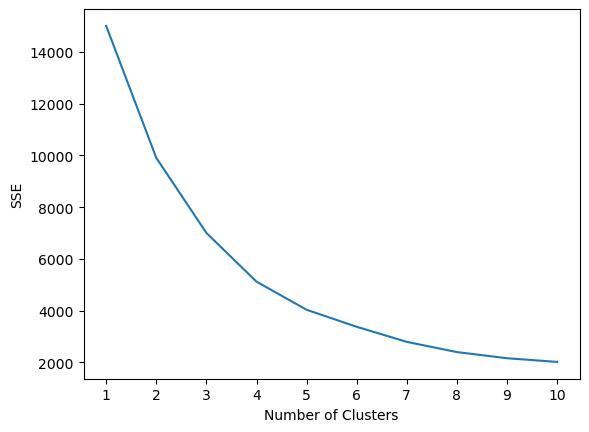

In [28]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [29]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_



array([1, 0, 1, ..., 2, 2, 2], dtype=int32)

In [30]:
new_dataset['cluster'] = kmeans.labels_
new_dataset

,age,region_encoded,genre_encoded,cluster
0,71,2,4,1
1,73,0,1,0
2,53,3,3,1
3,67,3,0,2
4,37,0,2,0
...,...,...,...,...
4995,31,2,0,2
4996,41,2,0,2
4997,19,3,0,2
4998,69,3,0,2


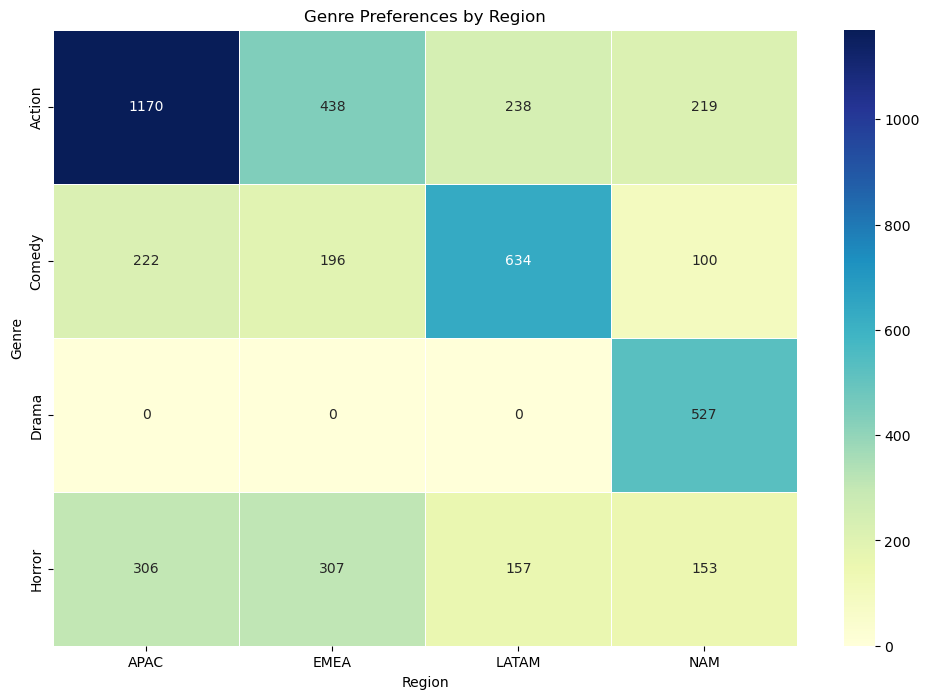

In [31]:
# Assuming you have a one-hot encoded 'genre' column with values 0 to 3
genre_mapping = {
    0: 'Action',
    1: 'Comedy',
    2: 'Drama',
    3: 'Horror'
}

# Apply the mapping to your one-hot encoded 'genre' column
new_dataset['genre'] = new_dataset['genre_encoded'].map(genre_mapping)

# Create a dictionary to map region codes to region names
region_mapping = {
    0: 'NAM',
    1: 'LATAM',
    2: 'EMEA',
    3: 'APAC'
}

# Apply the mapping to your one-hot encoded 'region' column
new_dataset['region'] = new_dataset['region_encoded'].map(region_mapping)

# Group the data by 'genre' and 'region' and calculate the frequency of each combination
genre_region_preferences = new_dataset.groupby(['genre', 'region']).size().unstack(fill_value=0)

# Visualize genre preferences by region using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_region_preferences, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.xlabel('Region')
plt.ylabel('Genre')
plt.title('Genre Preferences by Region')
plt.show()


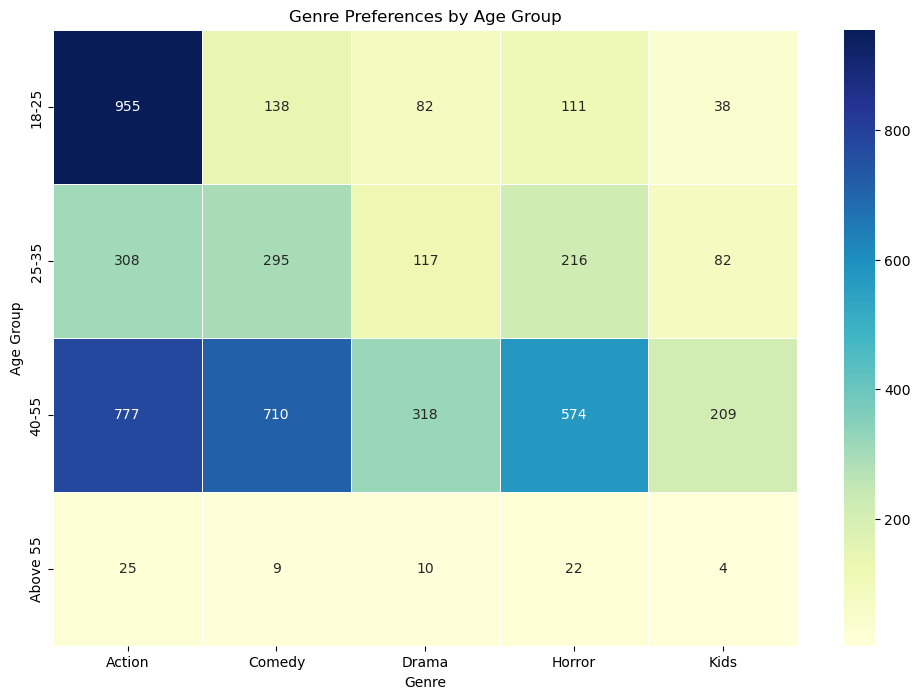

In [32]:
# Assuming you have a one-hot encoded 'genre' column with values 0 to 3
genre_mapping = {
    0: 'Action',
    1: 'Comedy',
    2: 'Drama',
    3: 'Horror'
}

# Apply the mapping to your one-hot encoded 'genre' column
new_dataset['genre'] = new_dataset['genre_encoded'].map(genre_mapping)
# Define age group bins and labels
age_bins = [18,25,40,75, float('inf')]  # Define your age group bins as needed
age_labels = ['18-25', '25-35', '40-55','Above 55']  # Define labels for the age groups

# Create a new column 'Age_Group' based on the age bins and labels
merged_df['Age_Group'] = pd.cut(merged_df['age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by 'Age_Group' and 'genre' and calculate the frequency of each combination
age_genre_preferences = merged_df.groupby(['Age_Group', 'genre']).size().unstack(fill_value=0)

# Map numeric genre codes to genre names in the heatmap
age_genre_preferences.columns = [genre_mapping.get(col, col) for col in age_genre_preferences.columns]

# Visualize genre preferences by age group using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(age_genre_preferences, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.title('Genre Preferences by Age Group')
plt.show()


In [33]:
merged_df.head()

,Customer_ID,Plan,Signup_Date,First_Charge_Date,Cancel_Date,Channel,movie,genre,age,region,Age_Group
0,1,Mail,2014-12-25,Null,Null,Direct,Modern Times,Kids,71,LATAM,40-55
1,1,Mail,2014-12-25,Null,Null,Direct,The Great Dictator,Comedy,73,APAC,40-55
2,1,Mail,2014-12-25,Null,Null,Direct,The Prestige,Horror,53,NAM,40-55
3,1,Mail,2014-12-25,Null,Null,Direct,Sunset Blvd.,Action,67,NAM,40-55
4,1,Mail,2014-12-25,Null,Null,Direct,Neverending Story,Drama,37,APAC,25-35


In [34]:
# Assuming 'merged_df' is your DataFrame
#pick a genre, compare it to other movie views for that genre???

# Count the occurrences of each movie title
movie_counts = merged_df['movie'].value_counts()

# Find the most watched movie
most_watched_movie = movie_counts.idxmax()
most_watched_count = movie_counts.max()

# Find the least watched movie
least_watched_movie = movie_counts.idxmin()
least_watched_count = movie_counts.min()

# Calculate the median watched movie
median_watched_movie = movie_counts[movie_counts >= movie_counts.median()].idxmin()
median_watched_count = movie_counts.median()

print(f"Most Watched Movie: {most_watched_movie} (Count: {most_watched_count})")
print(f"Least Watched Movie: {least_watched_movie} (Count: {least_watched_count})")
print(f"Median Watched Movie: {median_watched_movie} (Count: {median_watched_count})")

Most Watched Movie: The Silence of the Lambs (Count: 100)
Least Watched Movie: Sunset Blvd. (Count: 30)
Median Watched Movie: Se7en (Count: 42.0)


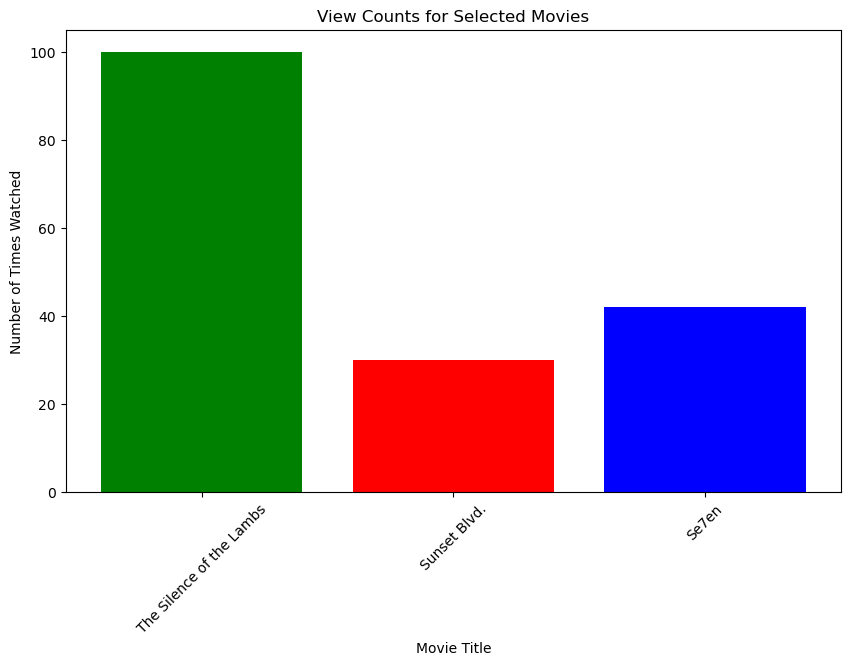

In [35]:
# bar chart
# most watched, least watched, and selected movie
# because the current data does not have daily/weekly data, we can collect that info and generate a time series model
# then do a statistical correlation based on the initial trends on how the movie is performing
# can also look at the genre it is in, similar length movies that are more successful, 
# and do a targeted correlation to predict how the movie will perform 


# Movie titles and their respective counts
movies = [most_watched_movie, least_watched_movie, median_watched_movie]
counts = [most_watched_count, least_watched_count, median_watched_count]

# Create a bar chart for the selected movies
plt.figure(figsize=(10, 6))
plt.bar(movies, counts, color=['green', 'red', 'blue'])
plt.xlabel('Movie Title')
plt.ylabel('Number of Times Watched')
plt.title('View Counts for Selected Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
